# Tell a better data story
In this competition, take on the role of an aspiring data sorcerer and use the magical AI assistant to craft a more enchanting visualization that reveals the distribution of magical creatures across Numeria's kingdoms.

<img src="A_hand-drawn_map-style_illustration_of_a_magical_k.jpg" alt="A hand-drawn map-style illustration of a magical kingdom" width="800"/>

## 📖 Once upon a time...
Valuable data about mystical creatures inhabiting the kingdoms of Numeria was gathered in the enchanted land of Numeria. Dragons, unicorns, fairies, goblins, elves, and trolls lived in places like the Enchanted Forest, Mystic Mountains, and Whispering Woods.

However, the chart in the Great Hall failed to clearly show how these creatures were distributed. A cryptic visualization lost important insights...

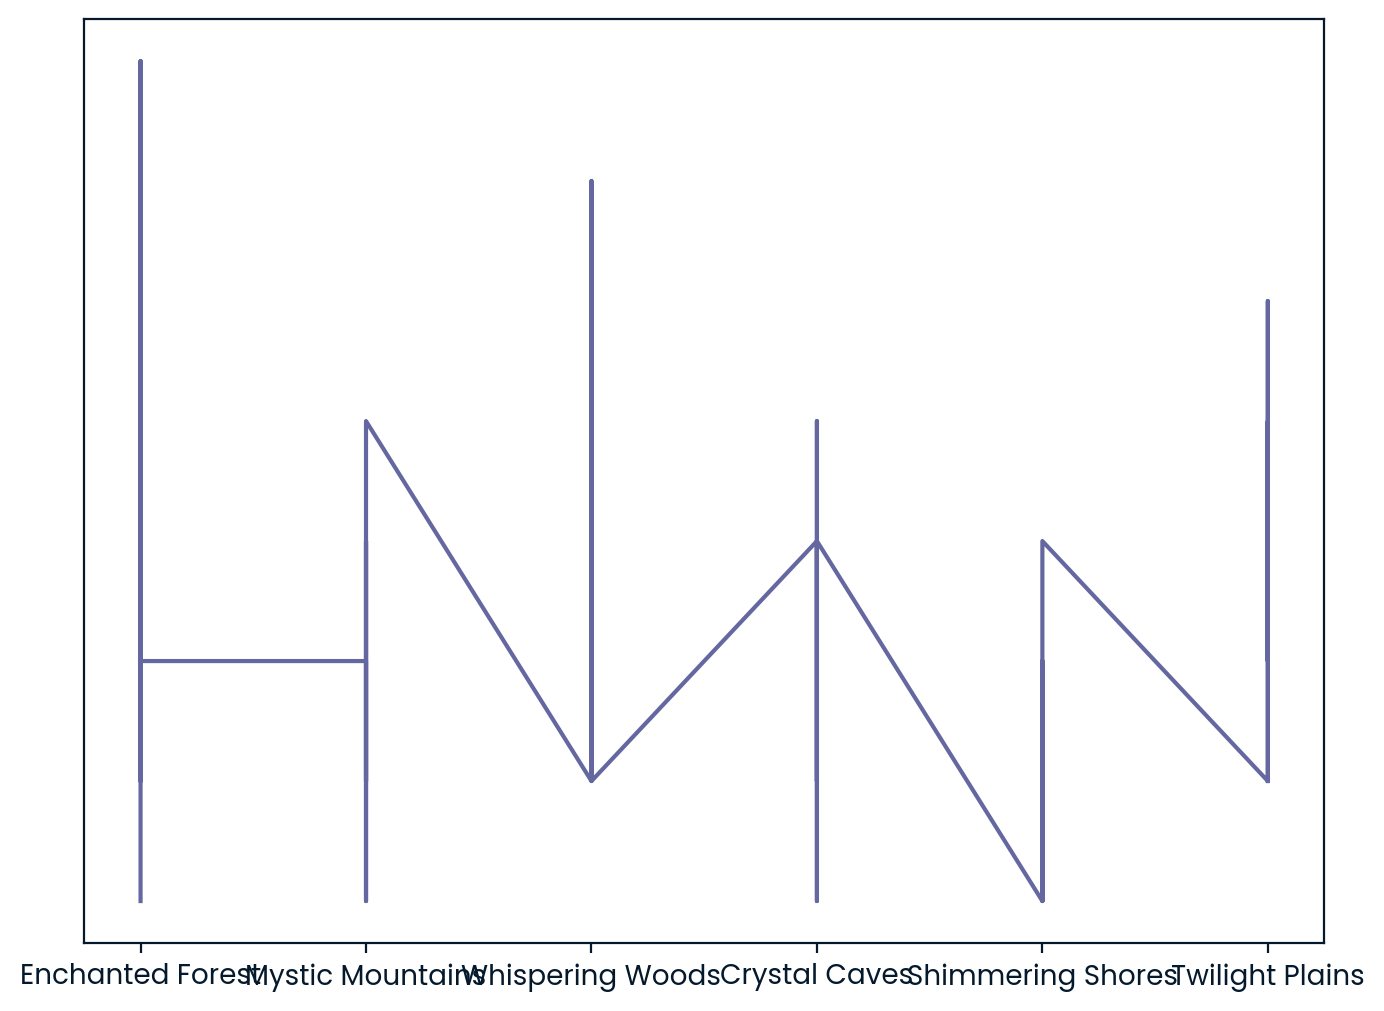

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('magical_creatures_by_kingdom.csv')

# Create poor visualization
plt.figure(figsize=(8, 6))
plt.plot(data['Kingdom'], data['Number_of_Creatures'])
plt.yticks([])  # Remove y axis numbers
plt.show()

## 🔍 Explore the magical dataset

Familiarize yourself with the magical data of Numeria. The dataset contains:

- Kingdom: The name of the kingdom where the creatures reside
- CreatureType: The type of mystical creature (e.g., Dragon, Unicorn)
- Number_of_Creatures: The total number of that creature type in the kingdom

In [20]:
import pandas as pd
import plotly.express as px
data = pd.read_csv('magical_creatures_by_kingdom.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Kingdom              36 non-null     object
 1   CreatureType         36 non-null     object
 2   Number_of_Creatures  36 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes


In [21]:
display(data.head(10))

,Kingdom,CreatureType,Number_of_Creatures
0,Enchanted Forest,Dragon,5
1,Enchanted Forest,Unicorn,20
2,Enchanted Forest,Fairy,40
3,Enchanted Forest,Goblin,10
4,Enchanted Forest,Elf,25
5,Enchanted Forest,Troll,15
6,Mystic Mountains,Dragon,15
7,Mystic Mountains,Unicorn,5
8,Mystic Mountains,Fairy,10
9,Mystic Mountains,Goblin,20


In [22]:
# Count the occurrences of each kingdom
kingdom_counts = data['Kingdom'].value_counts().reset_index()
kingdom_counts.columns = ['Kingdom', 'Count']

# Plot a pie chart using Plotly Express
fig = px.pie(kingdom_counts, names='Kingdom', values='Count', title='Distribution of Kingdoms')
fig.show()

In [23]:
# Create a histogram to show the number of magical creatures of each category in each kingdom
fig = px.histogram(data, x='CreatureType', y='Number_of_Creatures', color='Kingdom', 
                   title='Number of Magical Creatures by Category in Each Kingdom',
                   labels={'CreatureType': 'Type of Creature', 'Number_of_Creatures': 'Number of Creatures'},
                   barmode='group')

fig.show()

In [36]:
# # Bar Chart: Total number of creatures in each kingdom
# total_creatures_per_kingdom = data.groupby('Kingdom')['Number_of_Creatures'].sum().reset_index()
# fig = px.bar(total_creatures_per_kingdom, x='Kingdom', y='Number_of_Creatures', 
#              title='Total Number of Creatures in Each Kingdom',
#              labels={'Number_of_Creatures': 'Total Number of Creatures'})
# fig.show()
#Pie Chart
fig = px.pie(data, names='Kingdom', values='Number_of_Creatures', 
             title='Total Number of Creatures in Each Kingdom',
             labels={'Number_of_Creatures': 'Total Number of Creatures'})

fig.show()

In [29]:
def plot_pie_for_creature(df,creature_type):
    creature_df = df[df['CreatureType'] == creature_type]
    total = creature_df['Number_of_Creatures'].sum()
    creature_df['Percent'] = (creature_df['Number_of_Creatures'] / total) * 100
    
    fig = px.pie(creature_df, names='Kingdom', values='Percent', 
                 title=f'Distribution of {creature_type} Across Kingdoms', 
                 labels={'Percent': 'Percentage'})
    fig.show()

for creature in data['CreatureType'].unique():
    plot_pie_for_creature(data,creature)

In [32]:
def plot_pie_for_kingdom(df,kingdom):
    kingdom_df = df[df['Kingdom'] == kingdom]
    total = kingdom_df['Number_of_Creatures'].sum()
    kingdom_df['Percent'] = (kingdom_df['Number_of_Creatures'] / total) * 100
    
    fig = px.pie(kingdom_df, names='CreatureType', values='Percent', 
                 title=f'Distribution of Creatures Across {kingdom}', 
                 labels={'Percent': 'Percentage'})
    fig.show()

for kingdom in data['Kingdom'].unique():
    plot_pie_for_kingdom(data,kingdom)

In [27]:
def summarize_creature_distribution(var, var2):
    summary = ""
    total_creatures = data.groupby(var)['Number_of_Creatures'].sum()

    for creature_type in data[var].unique():
        creature_df = data[data[var] == creature_type]
        total = creature_df['Number_of_Creatures'].sum()
        
        # Summarizing for each kingdom
        summary += f"\nSummary for {creature_type}:\n"
        summary += f"Total {creature_type}s across all kingdoms: {total}\n"
        
        for _, row in creature_df.iterrows():
            percent = (row['Number_of_Creatures'] / total) * 100
            summary += f"  - {percent:.2f}% -- {row[var2]} ({row['Number_of_Creatures']} creatures).\n"

    return summary

# Summarize for all creature types
summary_report = summarize_creature_distribution('CreatureType','Kingdom')
print(summary_report)


Summary for Dragon:
Total Dragons across all kingdoms: 65
  - 7.69% -- Enchanted Forest (5 creatures).
  - 23.08% -- Mystic Mountains (15 creatures).
  - 15.38% -- Whispering Woods (10 creatures).
  - 30.77% -- Crystal Caves (20 creatures).
  - 7.69% -- Shimmering Shores (5 creatures).
  - 15.38% -- Twilight Plains (10 creatures).

Summary for Unicorn:
Total Unicorns across all kingdoms: 75
  - 26.67% -- Enchanted Forest (20 creatures).
  - 6.67% -- Mystic Mountains (5 creatures).
  - 20.00% -- Whispering Woods (15 creatures).
  - 6.67% -- Crystal Caves (5 creatures).
  - 13.33% -- Shimmering Shores (10 creatures).
  - 26.67% -- Twilight Plains (20 creatures).

Summary for Fairy:
Total Fairys across all kingdoms: 130
  - 30.77% -- Enchanted Forest (40 creatures).
  - 7.69% -- Mystic Mountains (10 creatures).
  - 26.92% -- Whispering Woods (35 creatures).
  - 3.85% -- Crystal Caves (5 creatures).
  - 11.54% -- Shimmering Shores (15 creatures).
  - 19.23% -- Twilight Plains (25 creature

In [28]:
summary_report = summarize_creature_distribution('Kingdom','CreatureType')
print(summary_report)


Summary for Enchanted Forest:
Total Enchanted Forests across all kingdoms: 115
  - 4.35% -- Dragon (5 creatures).
  - 17.39% -- Unicorn (20 creatures).
  - 34.78% -- Fairy (40 creatures).
  - 8.70% -- Goblin (10 creatures).
  - 21.74% -- Elf (25 creatures).
  - 13.04% -- Troll (15 creatures).

Summary for Mystic Mountains:
Total Mystic Mountainss across all kingdoms: 85
  - 17.65% -- Dragon (15 creatures).
  - 5.88% -- Unicorn (5 creatures).
  - 11.76% -- Fairy (10 creatures).
  - 23.53% -- Goblin (20 creatures).
  - 11.76% -- Elf (10 creatures).
  - 29.41% -- Troll (25 creatures).

Summary for Whispering Woods:
Total Whispering Woodss across all kingdoms: 105
  - 9.52% -- Dragon (10 creatures).
  - 14.29% -- Unicorn (15 creatures).
  - 33.33% -- Fairy (35 creatures).
  - 14.29% -- Goblin (15 creatures).
  - 19.05% -- Elf (20 creatures).
  - 9.52% -- Troll (10 creatures).

Summary for Crystal Caves:
Total Crystal Cavess across all kingdoms: 85
  - 23.53% -- Dragon (20 creatures).
  - 

### Narrative for Creature Distribution Across Kingdoms of Numeria

"The chart reveals a striking diversity among the magical creatures that inhabit the various kingdoms of Numeria. The Numeria has 6 Kingdoms each consisting of various creatures inhibited in them. The **Enchanted Forest** stands out as the most populated region, with its vast population of **Fairies** followed by **Elves** making it a thriving haven of enchantment. With **34.8% of Fairies** and **21.7% of Elves** residing here, this forest truly lives up to its mystical reputation. Its balance of creatures suggests a rich ecosystem that fosters both beauty and magic.

Overall, the distribution of creatures across these kingdoms provides insight on they are spread across the nations. The results are depicted below
|          Kingdom         | Total Creatures | Dragon (%) | Unicorn (%) | Fairy (%) | Goblin (%) | Elf (%) | Troll (%) |
|:------------------------:|:---------------:|:----------:|:-----------:|:---------:|:----------:|:-------:|:---------:|
|   Enchanted Forest       |       115       |    4.35    |    17.39    |   34.78   |    8.70    |  21.74  |   13.04   |
|   Mystic Mountains       |       85        |   17.65    |    5.88     |   11.76   |   23.53    |  11.76  |   29.41   |
|   Whispering Woods       |       105       |    9.52    |    14.29    |   33.33   |   14.29    |  19.05  |   9.52    |
|   Crystal Caves          |       85        |   23.53    |    5.88     |    5.88   |   29.41    |  11.76  |   23.53   |
|   Shimmering Shores      |       60        |    8.33    |    16.67    |   25.00   |    8.33    |   8.33  |   33.33   |
|   Twilight Plains        |       110       |    9.09    |    18.18    |   22.73   |   13.64    |  27.27  |   9.09    |


---

### Reflection and Impact

**Initial chart issues:**
The original chart provided no specifics on the distribution of creatures in each kingdom and it lacked context. It did not effectively convey how each creature's presence compared to others, nor did it offer percentages, making it hard to grasp relative proportions.

**Improvements made:**
- Introduced percentage distribution in pie charts, making it clearer how each creature type is spread across kingdoms.
- Narrated insights based on the chart, offering a deeper understanding of each kingdom's characteristics and fostering more engaging storytelling.

**Further improvements:**
- Adding interactivity to the charts, such as hover effects with more detailed breakdowns, could make the visualizations even more informative. 


## 🧙 Your quest

As a budding data sorcerer, your quest is to improve the above data visualization. You can modify the existing (hidden) code, or create a new one from scratch.
- Follow the steps to create a chart that:
    - Represents the data in an appropriate format
    - Is clear and accessible
    - Reveals insights
&nbsp;
- Summarize your findings (see below)

## 🎓 [OPTIONAL] Learn some basics! 

If you haven't already, take our short course on [Communicating Data Insights](https://app.datacamp.com/learn/courses/communicating-data-insights), which includes the basics of storytelling with data. If you have more time, also check out [Data Storytelling Concepts](https://app.datacamp.com/learn/courses/data-storytelling-concepts). 

You will be awarded a Statement of Accomplishment when you complete either course. You can find a link to your Statement of Accomplishment on the course home page using the above link. Feel free to share a link to your statement!

## 🧙‍♂️ Try Some More Changes

Consider asking the AI assistant to:
- Add some colour
- Add data labels

Think about readability and experiment with:
- Font sizes
- Axis labels
- Legends
- Anything else that you learned from the courses!

## ✍️ Tell a Story

Weave a narrative around your chart.

Here's an example: "The chart reveals that the Enchanted Forest is home to the highest number of magical creatures, making it the most mystical region in Numeria. The Shimmering Shores has the fewest, suggesting a quieter, perhaps less explored kingdom. This information could help to allocate resources or plan grand events to celebrate the magical diversity of Numeria."

Simplicity is magic. While creativity is encouraged, ensure that your chart and story remain clear and understandable.

Reflect on your improvements and the impact they have. Consider the following questions:
- What was so bad about the initial chart? 
- What other improvements could be made?

Submit your chart alongside your reflections and a short story. Aim for around 300 words in total.

# 🧑‍⚖️ Judging Criteria

This is a community-based competition. Once the competition concludes, you'll have the opportunity to view and vote for the most creative and educational submissions. 

The top 5 most upvoted entries will win. The winners will receive DataCamp merchandise.

## ✅ Checklist Before Publishing into the Competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your chart, reflections, and story.

## ⌛️ Time is Ticking. Good Luck!
Embark on your quest to enchant Numeria with your data storytelling prowess. May your visualizations sparkle with insight and magic!